In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [4]:
plt.rc('font', size=12)

In [5]:
# No REx - LR 0.1
MP202 = get_results("MP202")
MP203 = get_results("MP203")
MP204 = get_results("MP204")

# REx - 0.1 - LR 0.1
MP205 = get_results("MP205")
MP206 = get_results("MP206")
MP207 = get_results("MP207")

# REx - 1.0 - LR 0.1
MP208 = get_results("MP208")
MP209 = get_results("MP209")
MP210 = get_results("MP210")

# REx - 10.0 - LR 0.1
MP211 = get_results("MP211")
MP212 = get_results("MP212")
MP213 = get_results("MP213")

# REx - 10.0 - LR 0.1 - No Variance Bounding
MP214 = get_results("MP214")
MP215 = get_results("MP215")
MP216 = get_results("MP216")

# REx - 5.0 - LR 0.1
MP217 = get_results("MP217")
MP218 = get_results("MP218")
MP219 = get_results("MP219")

# REx - 2.0 - LR 0.1
MP220 = get_results("MP220")
MP221 = get_results("MP221")
MP222 = get_results("MP222")

In [6]:
# No REx - LR 0.1
MP202_details = get_experiment_details("MP202", get_elites=True)
MP203_details = get_experiment_details("MP203", get_elites=True)
MP204_details = get_experiment_details("MP204", get_elites=True)

# REx_details - 0.1 - LR 0.1
MP205_details = get_experiment_details("MP205", get_elites=True)
MP206_details = get_experiment_details("MP206", get_elites=True)
MP207_details = get_experiment_details("MP207", get_elites=True)

# REx_details - 1.0 - LR 0.1
MP208_details = get_experiment_details("MP208", get_elites=True)
MP209_details = get_experiment_details("MP209", get_elites=True)
MP210_details = get_experiment_details("MP210", get_elites=True)

# REx_details - 10.0 - LR 0.1
MP211_details = get_experiment_details("MP211", get_elites=True)
MP212_details = get_experiment_details("MP212", get_elites=True)
MP213_details = get_experiment_details("MP213", get_elites=True)

# REx_details - 10.0 - LR 0.1 - No Variance Bounding
MP214_details = get_experiment_details("MP214", get_elites=True)
MP215_details = get_experiment_details("MP215", get_elites=True)
MP216_details = get_experiment_details("MP216", get_elites=True)

# REx_details - 5.0 - LR 0.1
MP217_details = get_experiment_details("MP217", get_elites=True)
MP218_details = get_experiment_details("MP218", get_elites=True)
MP219_details = get_experiment_details("MP219", get_elites=True)

# REx_details - 2.0 - LR 0.1
MP220_details = get_experiment_details("MP220", get_elites=True)
MP221_details = get_experiment_details("MP221", get_elites=True)
MP222_details = get_experiment_details("MP222", get_elites=True)

In [7]:
average_scores_over_seeds((MP202, MP203, MP204))

{'model_pol_total_loss_history': 0.19003288385904762,
 'model_pol_var_loss_history': 0.00944182604602857,
 'model_train_decay_loss_history': 2.533963884,
 'model_train_var_lim_loss_history': 1.2837439346666666,
 'model_pol_std_loss_history': 0.08966938893883014}

# MP202-MP213

Initial runs using beta=0.1, 1. and 10. The learning rate decay factor was held constant at 0.1, and applied to the total loss.

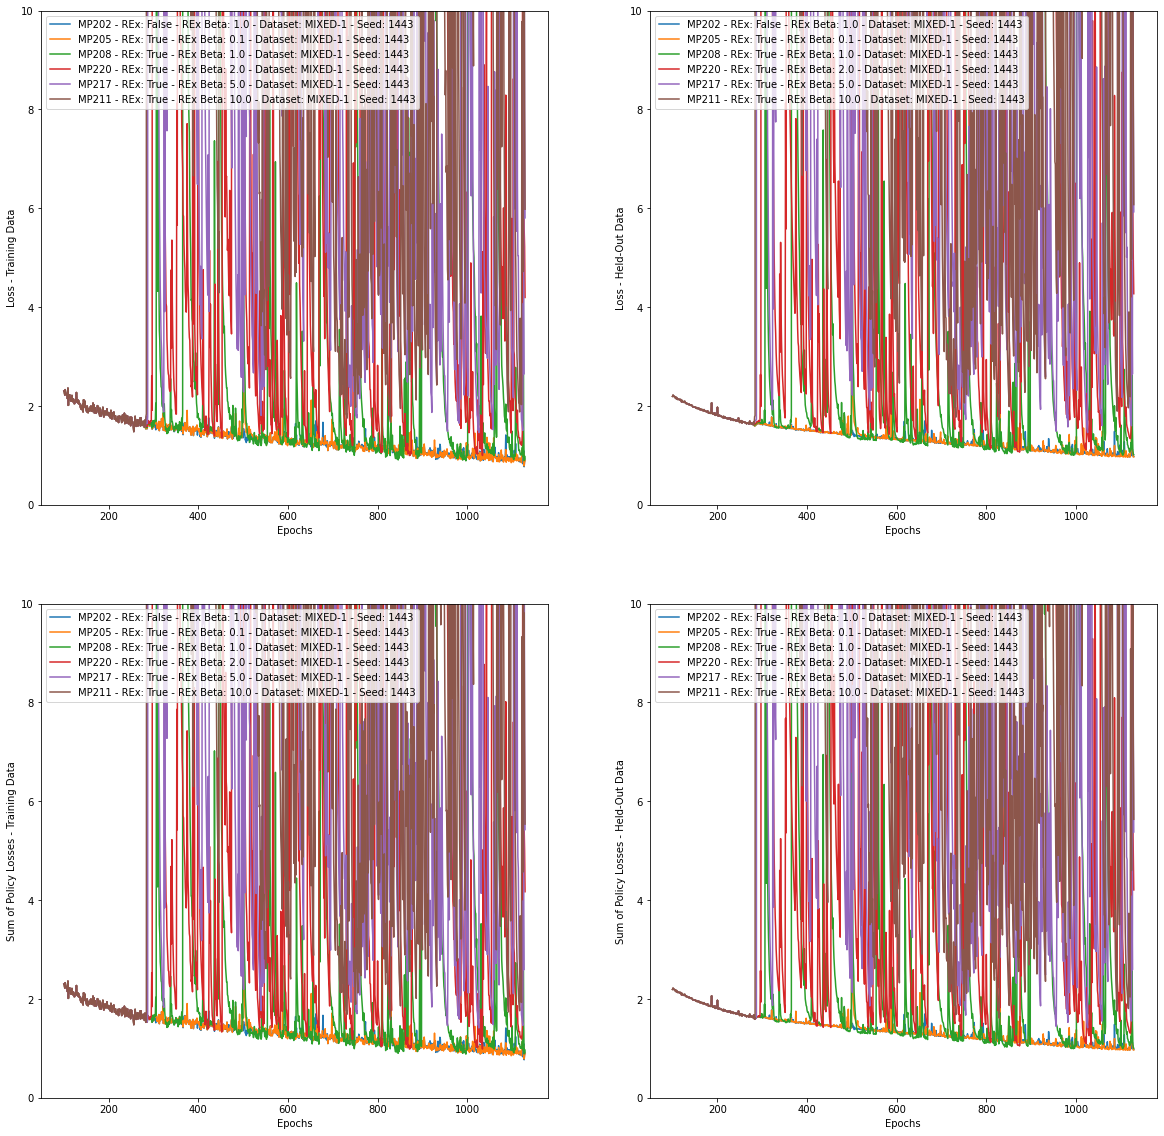

In [31]:
window = 1
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP202,
    MP205,
    MP208,
    MP220,
    MP217,
    MP211,
    # MP214,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1).rolling(window=window).mean()[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1).rolling(window=window).mean()[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1).rolling(window=window).mean()[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1).rolling(window=window).mean()[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

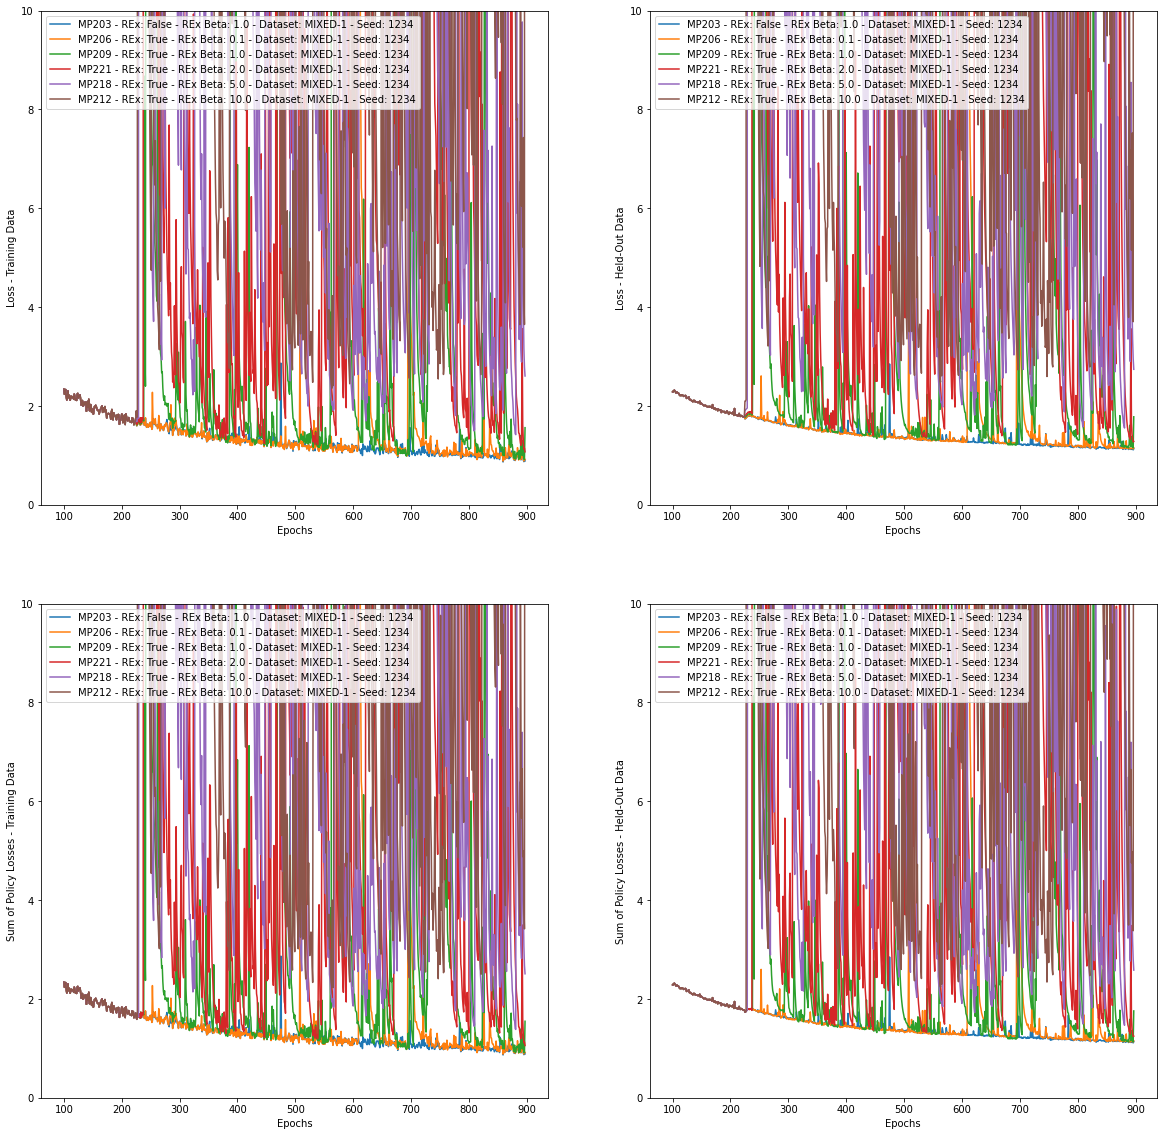

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP203,
    MP206,
    MP209,
    # MP215,
    MP221,
    MP218,
    MP212,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

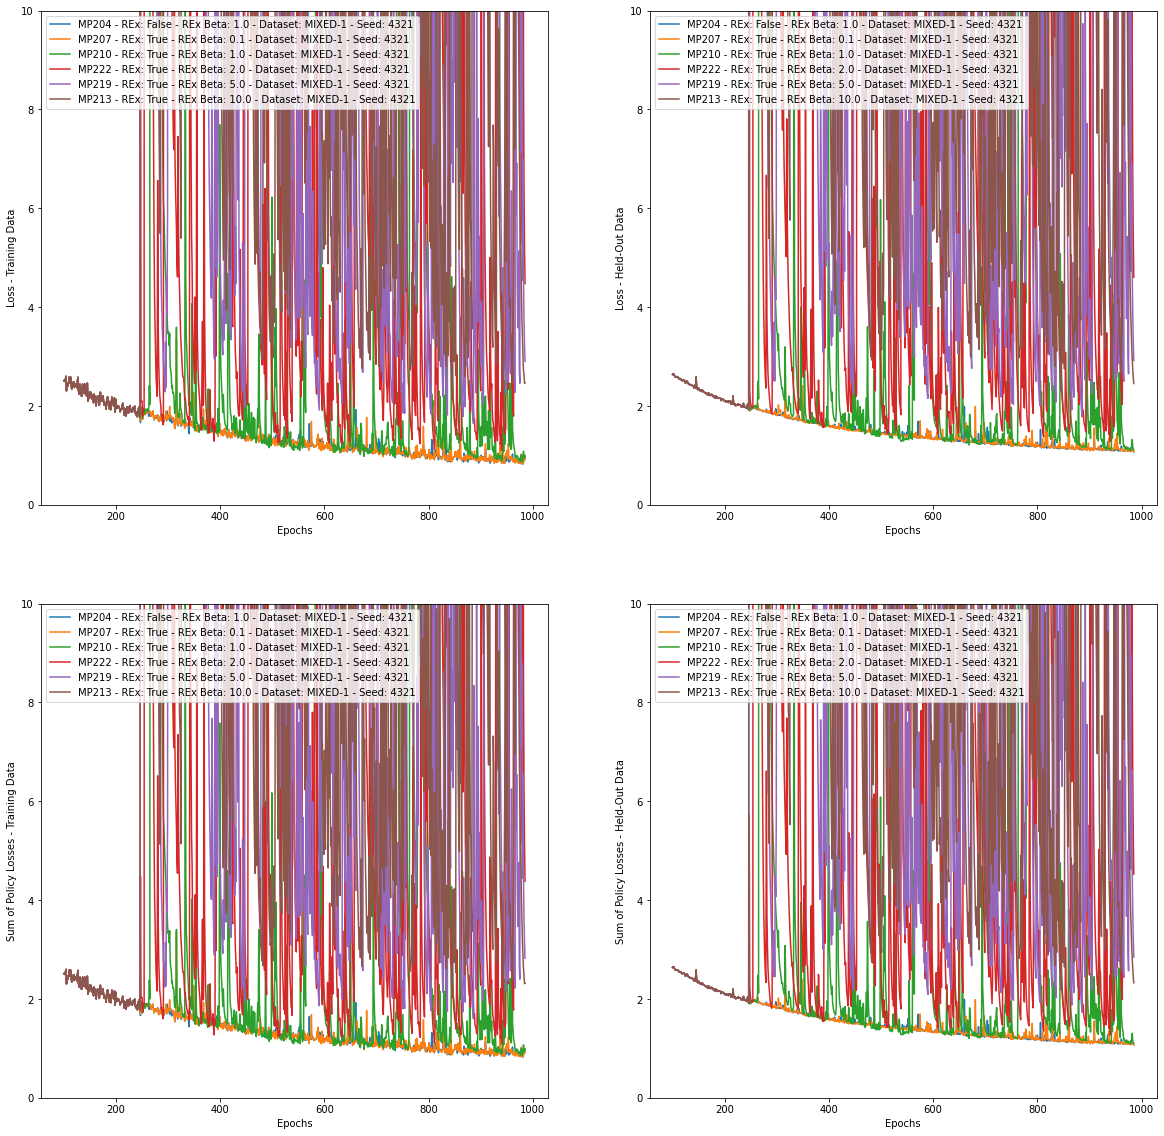

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP204,
    MP207,
    MP210,
    # MP216,
    MP222,
    MP219,
    MP213,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

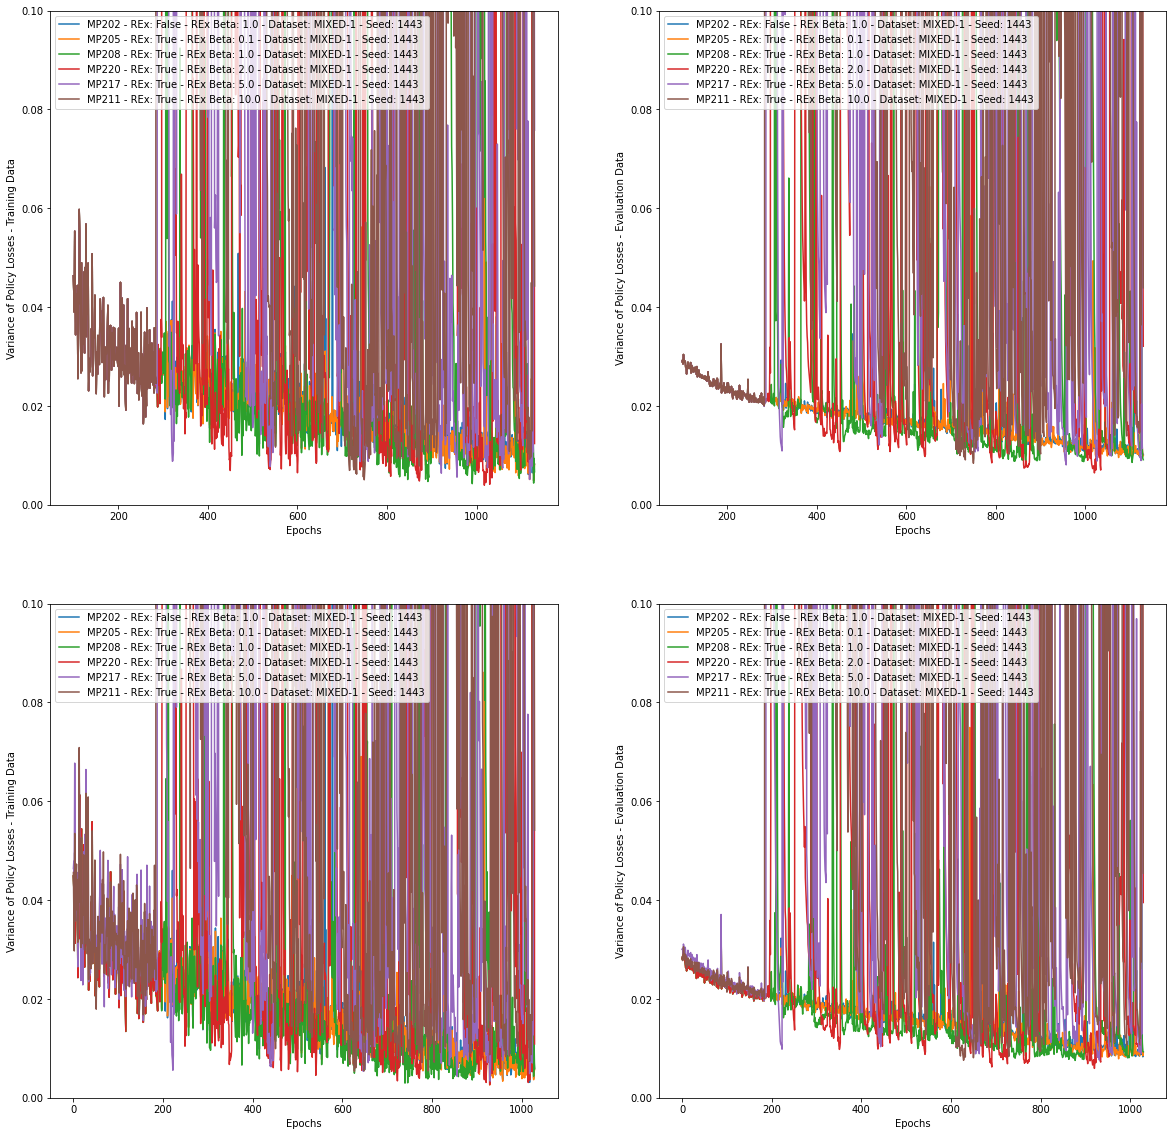

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP202, MP202_details),
    (MP205, MP205_details),
    (MP208, MP208_details),
    # (MP214, MP214_details),
    (MP220, MP220_details),
    (MP217, MP217_details),
    (MP211, MP211_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if j == 0:
                ax[i,j].set_ylim(0,0.1)
            else:
                ax[i,j].set_ylim(0,0.1)
            ax[i,j].legend()
pass

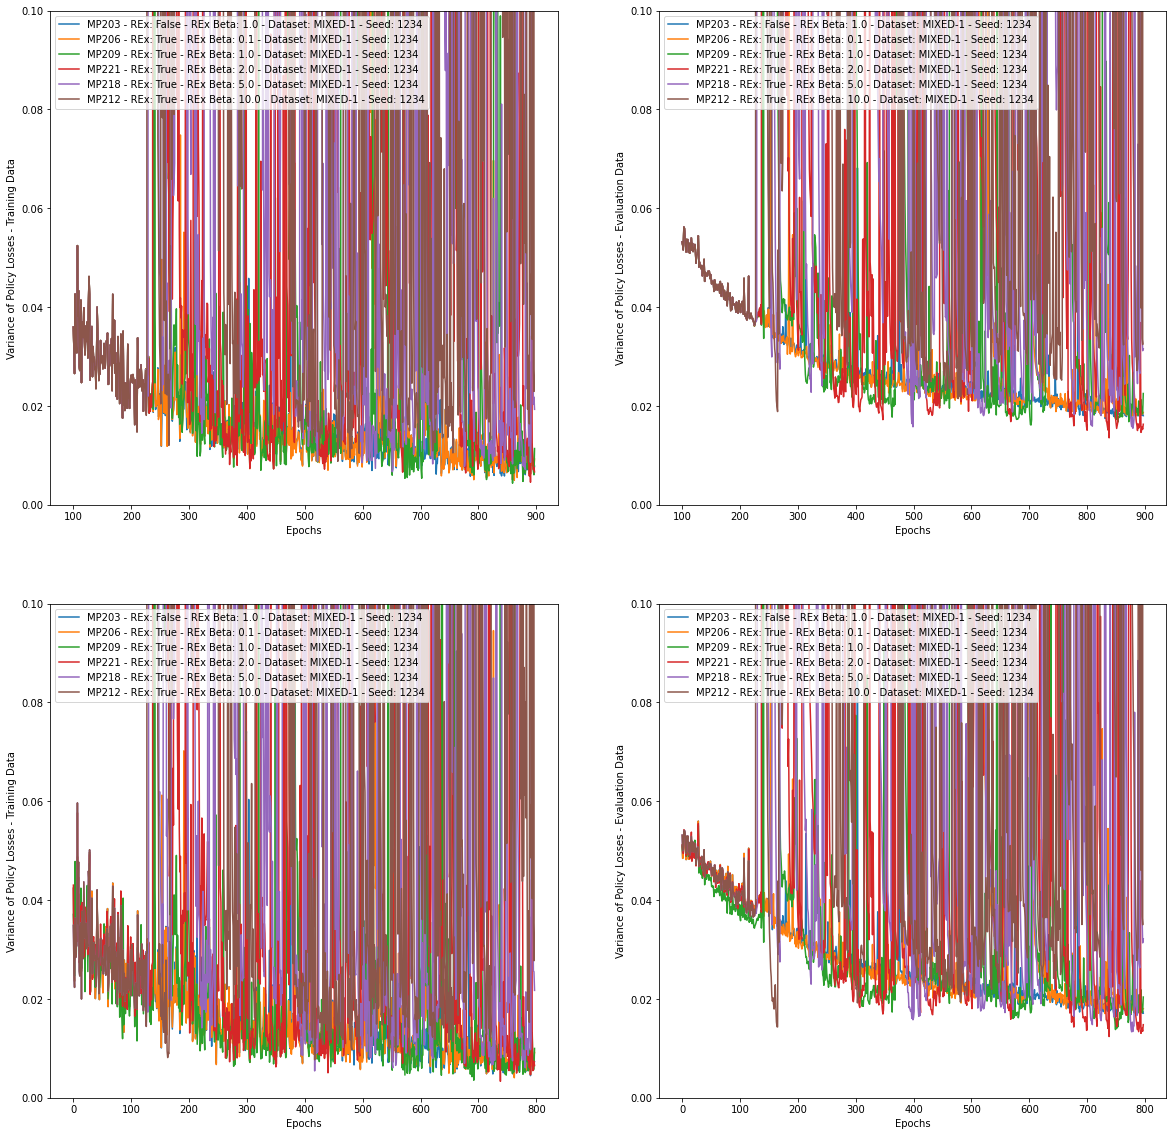

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP203, MP203_details),
    (MP206, MP206_details),
    (MP209, MP209_details),
    # (MP215, MP215_details),
    (MP221, MP221_details),
    (MP218, MP218_details),
    (MP212, MP212_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if j == 0:
                ax[i,j].set_ylim(0,0.1)
            else:
                ax[i,j].set_ylim(0,0.1)
            ax[i,j].legend()
pass

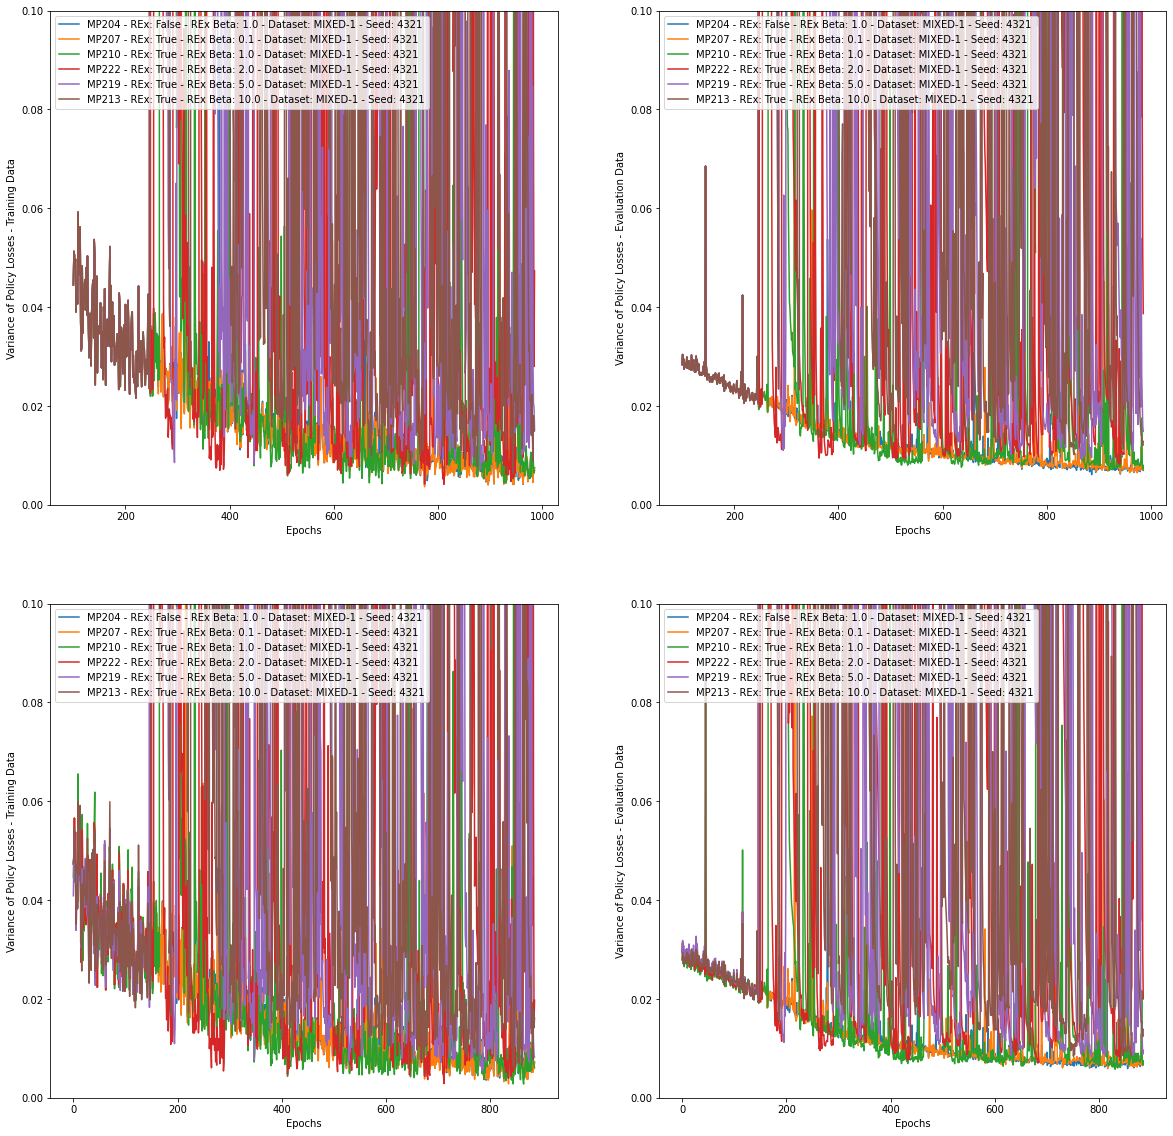

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP204, MP204_details),
    (MP207, MP207_details),
    (MP210, MP210_details),
    # (MP216, MP216_details),
    (MP222, MP222_details),
    (MP219, MP219_details),
    (MP213, MP213_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if j == 0:
                ax[i,j].set_ylim(0,0.1)
            else:
                ax[i,j].set_ylim(0,0.1)
            ax[i,j].legend()
pass

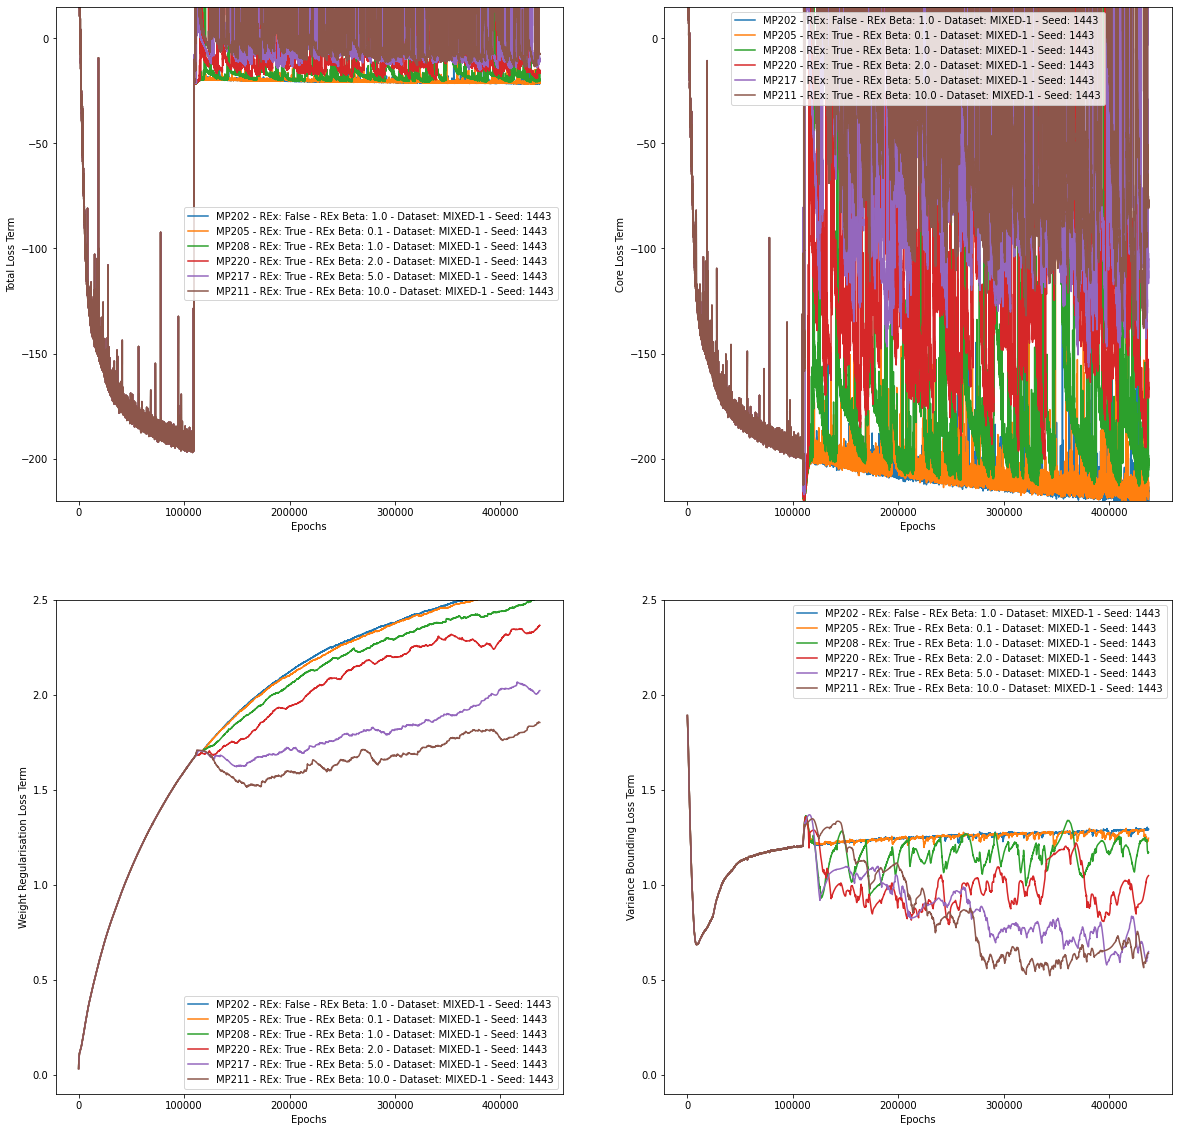

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP202,
    MP205,
    MP208,
    # MP214,
    MP220,
    MP217,
    MP211,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-220.,15.)
            else:
                ax[i,j].set_ylim(-0.1,2.5)
            ax[i,j].legend()
pass

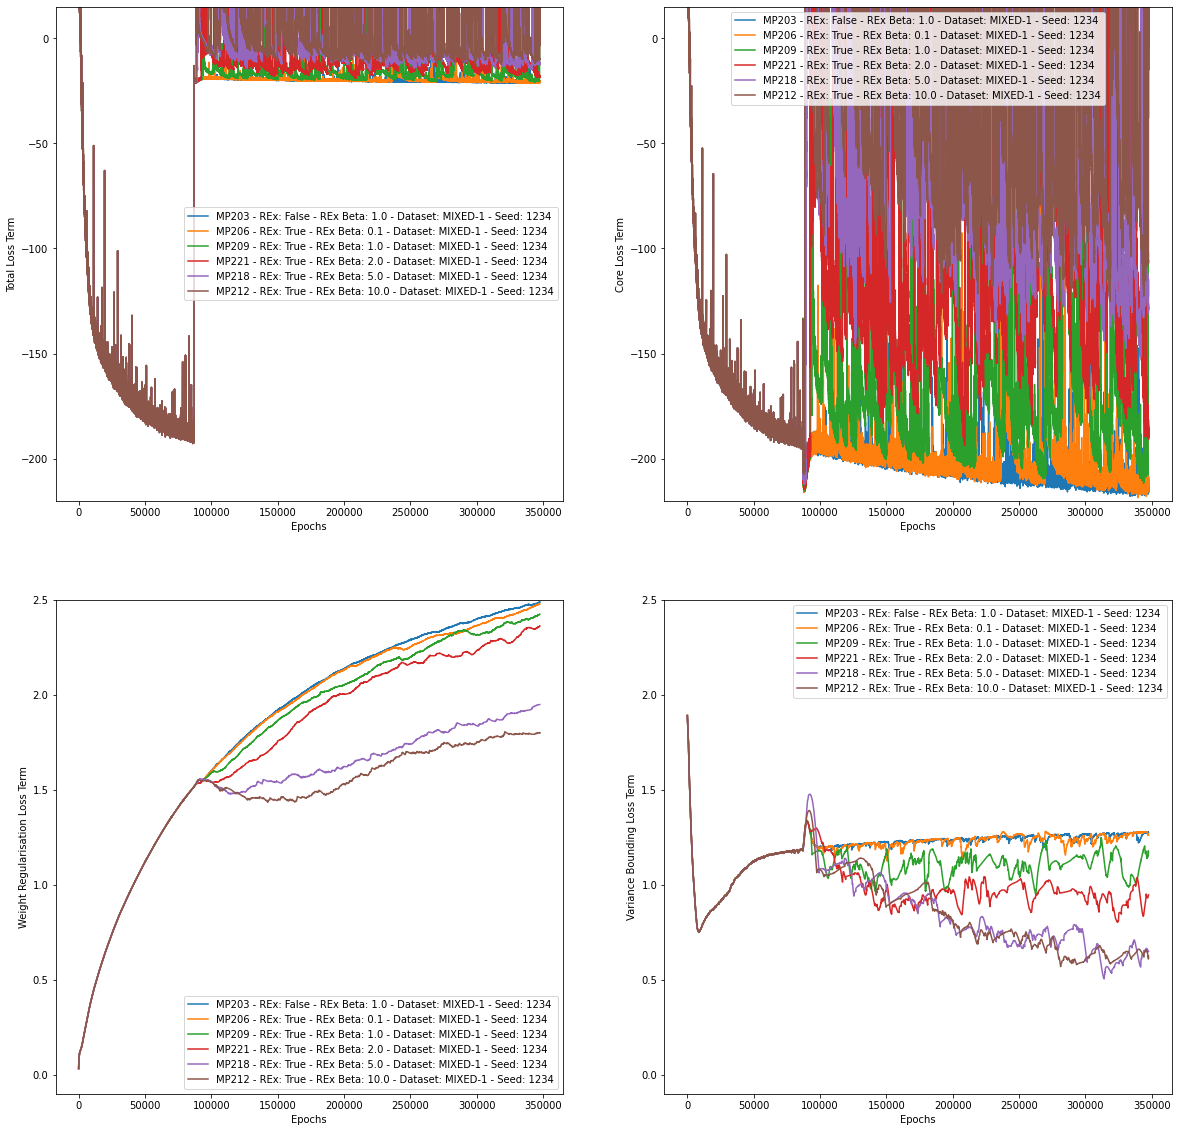

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP203,
    MP206,
    MP209,
    # MP215,
    MP221,
    MP218,
    MP212,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-220.,15.)
            else:
                ax[i,j].set_ylim(-0.1,2.5)
            ax[i,j].legend()
pass

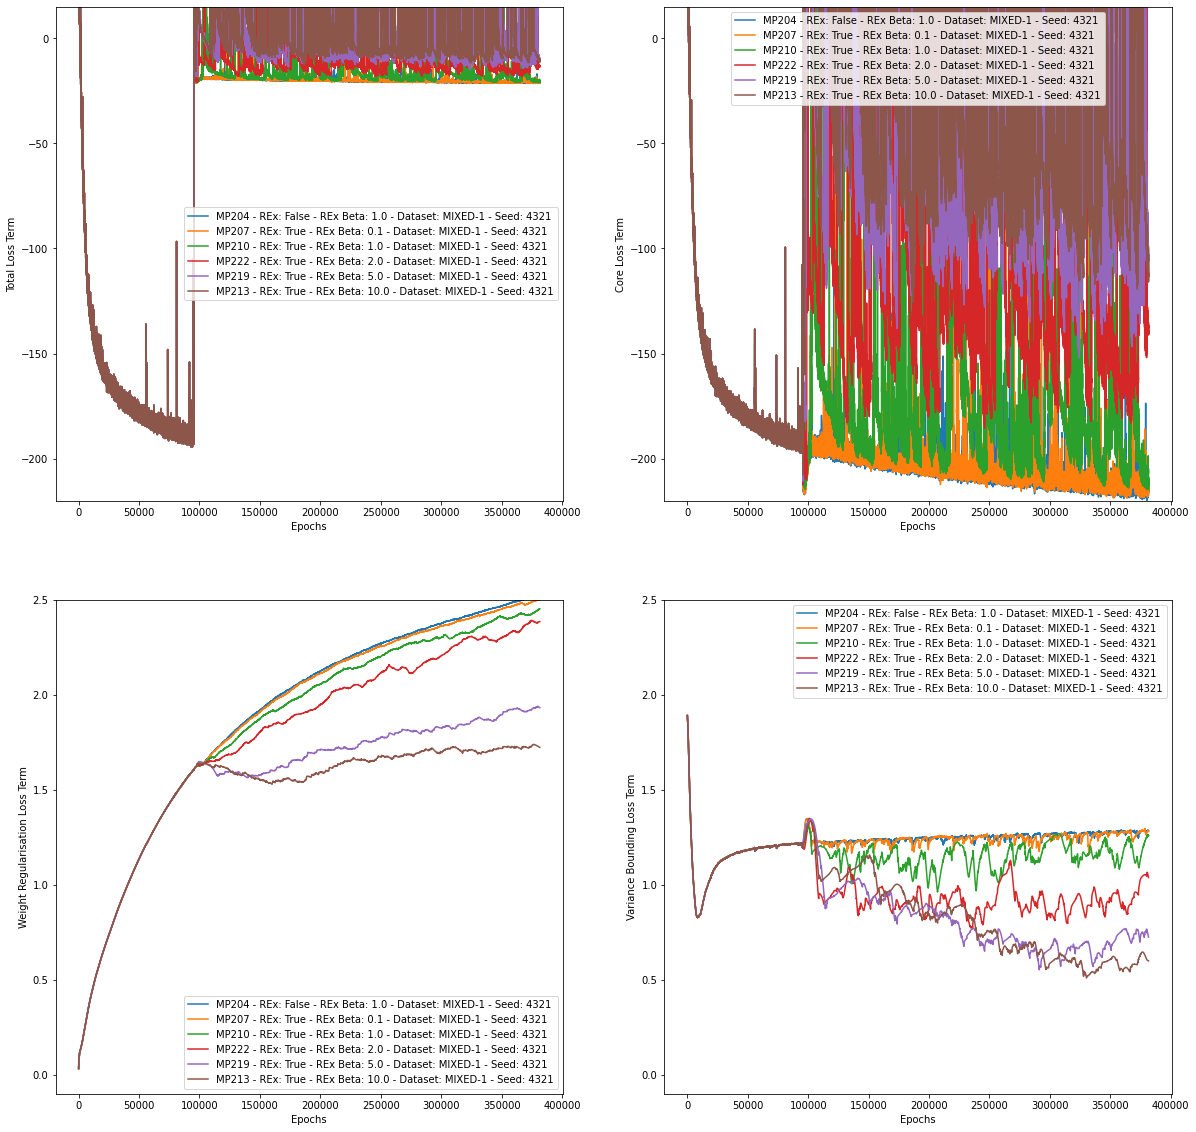

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP204,
    MP207,
    MP210,
    # MP216,
    MP222,
    MP219,
    MP213,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-220.,15.)
            else:
                ax[i,j].set_ylim(-0.1,2.5)
            ax[i,j].legend()
pass

# MP223-MP231

Runs with SAC training.

In [17]:
# No REx - LR 0.1 - SAC
MP223 = get_results("MP223")
MP224 = get_results("MP224")
MP225 = get_results("MP225")

# REx - 2.0 - LR 0.1 - SAC
MP226 = get_results("MP226")
MP227 = get_results("MP227")
MP228 = get_results("MP228")

# REx - 2.0 - LR 0.1 - SAC
MP229 = get_results("MP229")
MP230 = get_results("MP230")
MP231 = get_results("MP231")

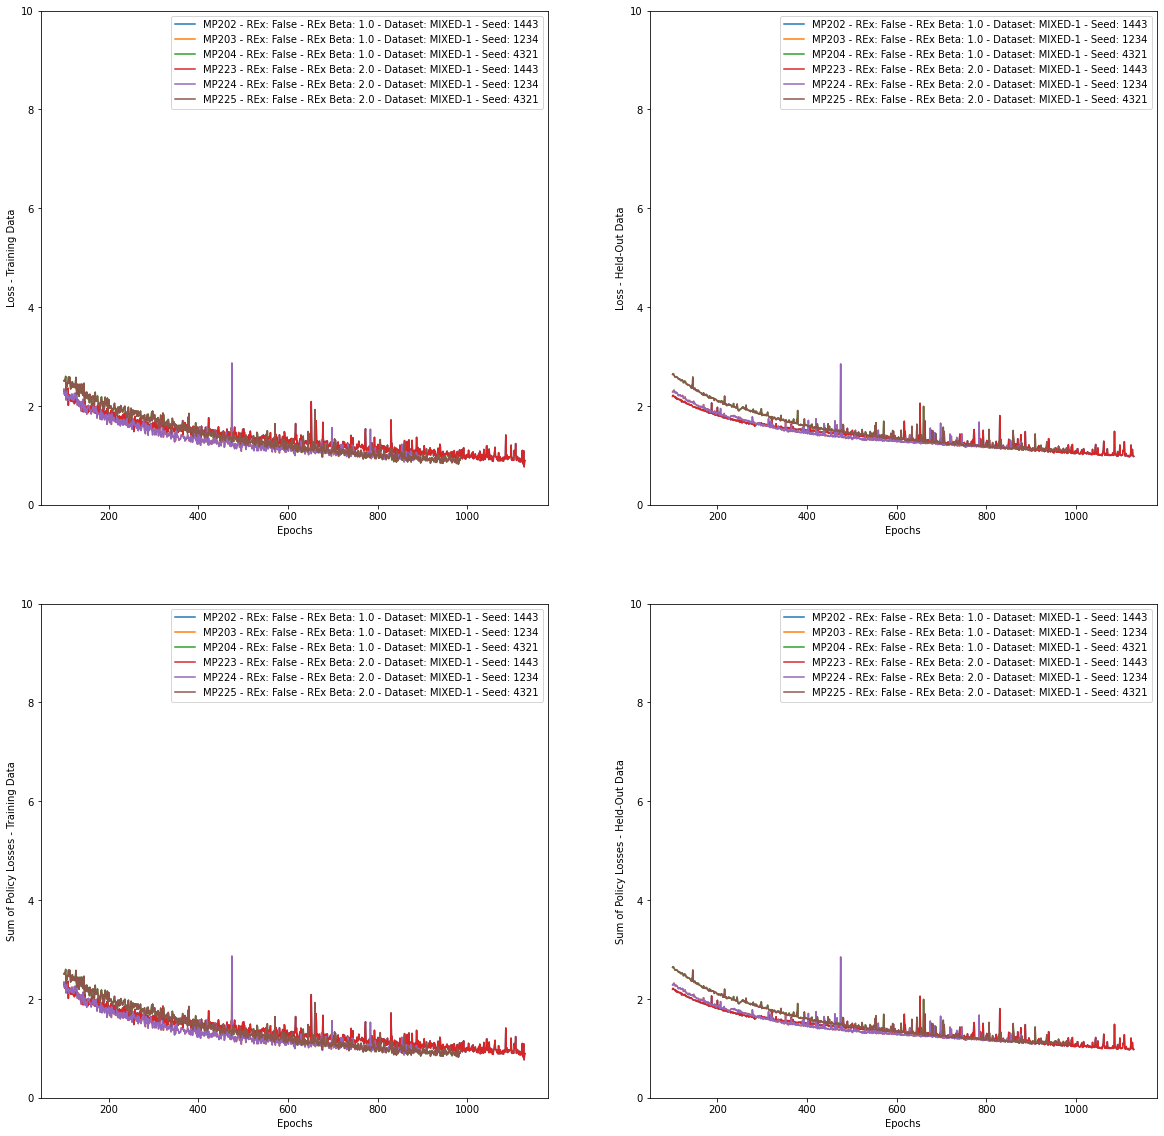

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP202,
    MP203,
    MP204,
    MP223,
    MP224,
    MP225,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

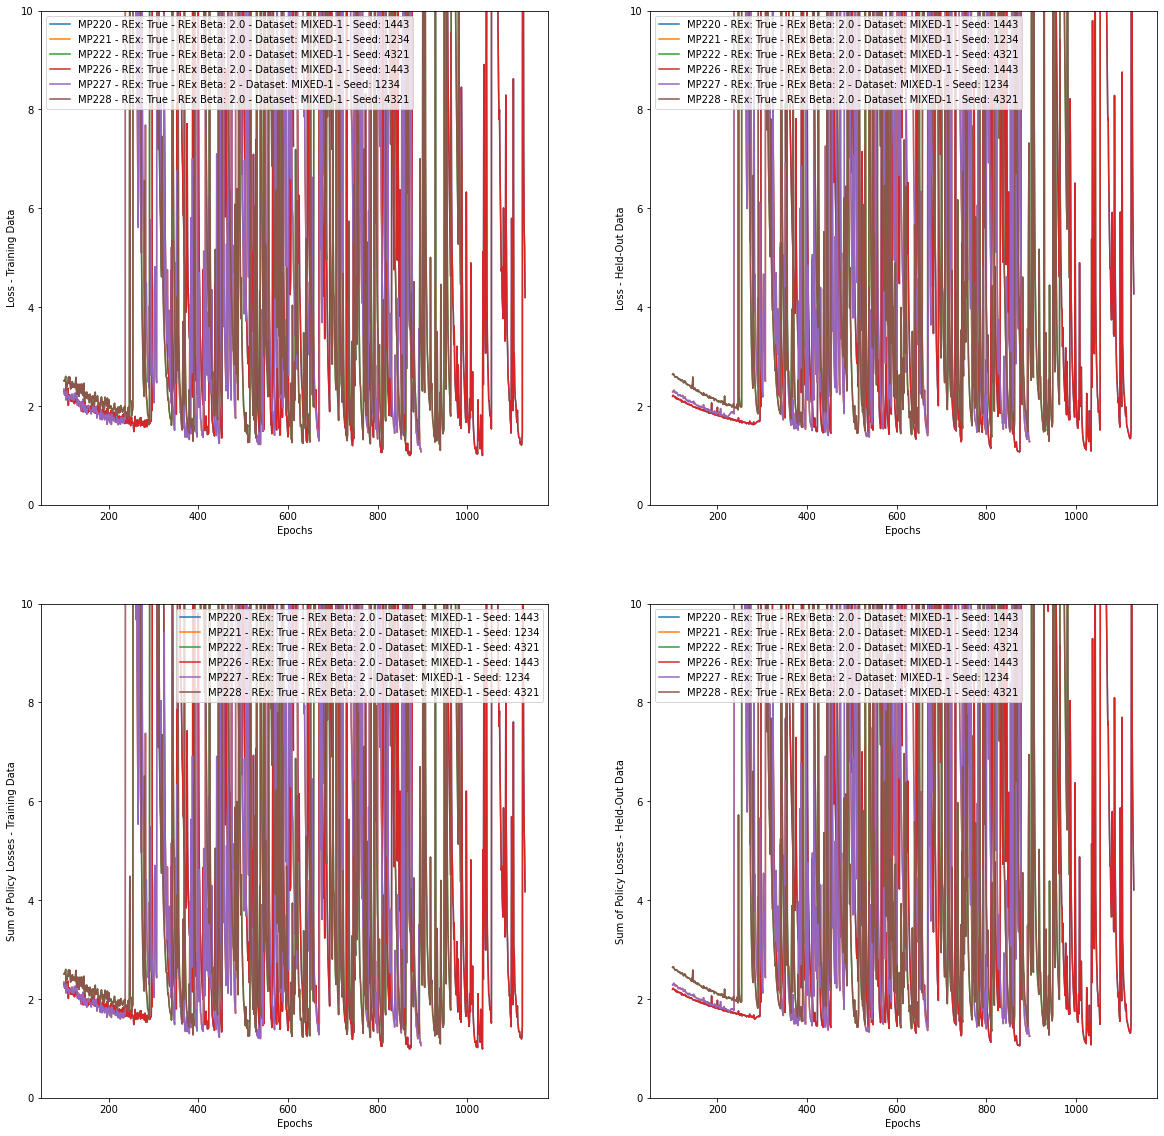

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP220,
    MP221,
    MP222,
    MP226,
    MP227,
    MP228,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

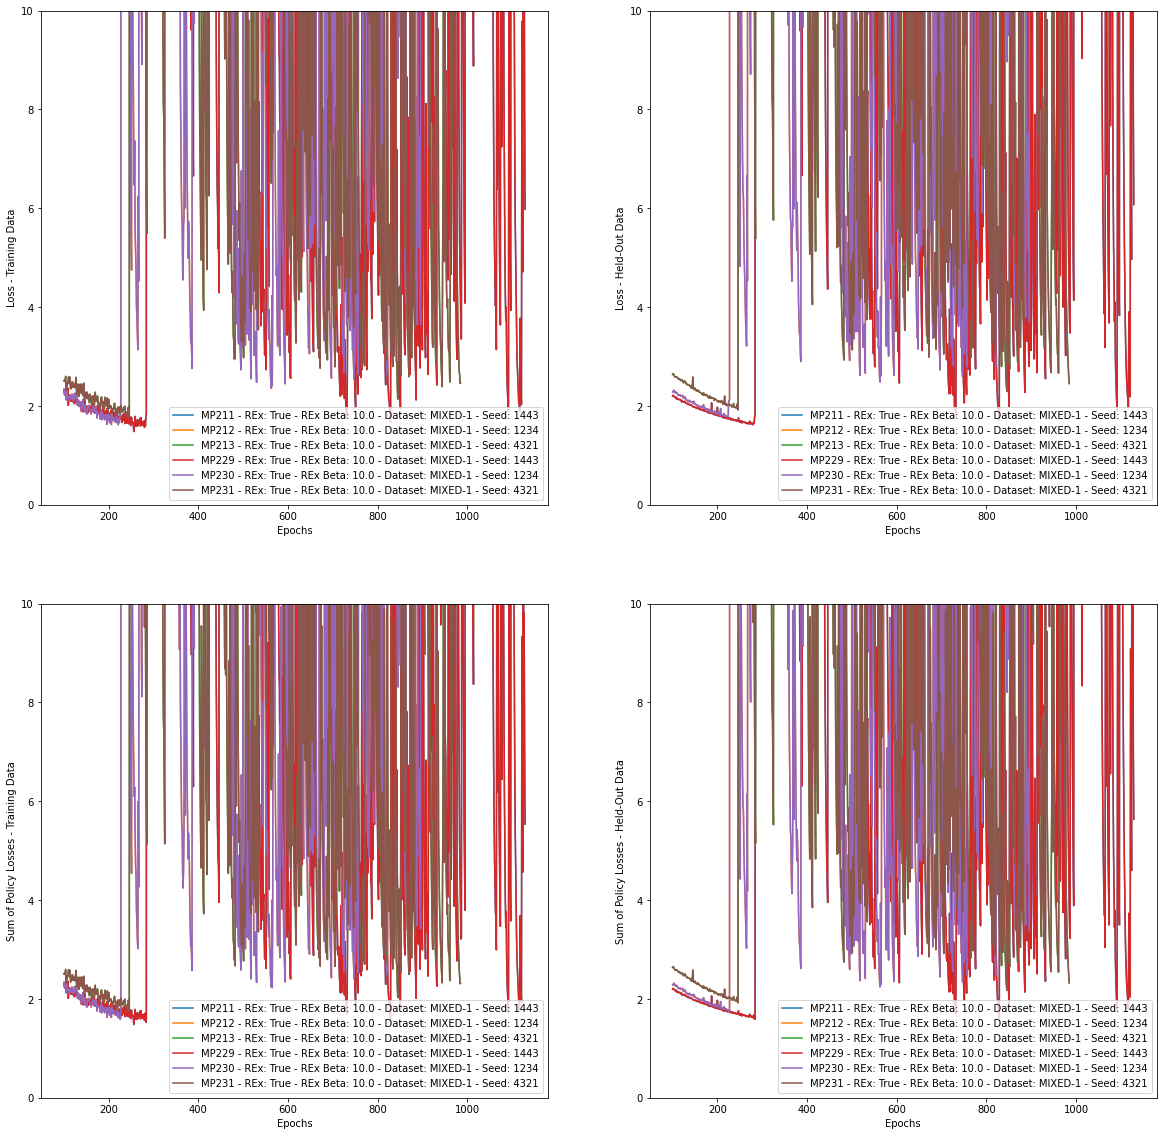

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP211,
    MP212,
    MP213,
    MP229,
    MP230,
    MP231,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,10.0)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,10.0)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.0)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.0)
    ax[1,1].legend()
pass

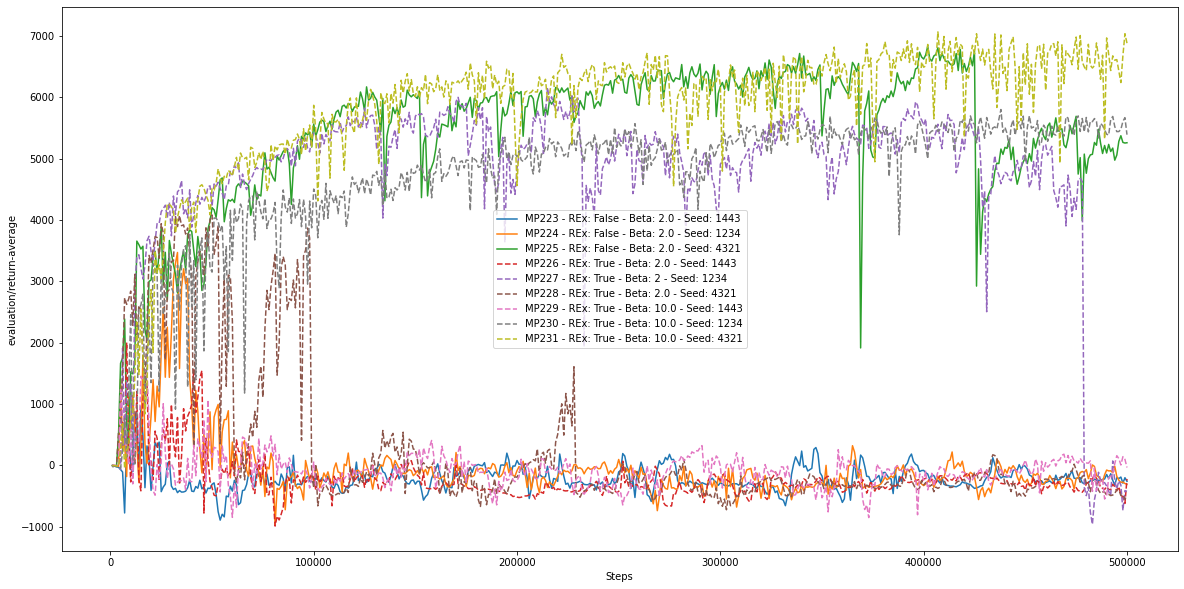

In [21]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP223,
    MP224,
    MP225,
    MP226,
    MP227,
    MP228,
    MP229,
    MP230,
    MP231,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Beta: {exp.rex_beta} - Seed: {exp.seed}', ls='--' if exp.rex else '-'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

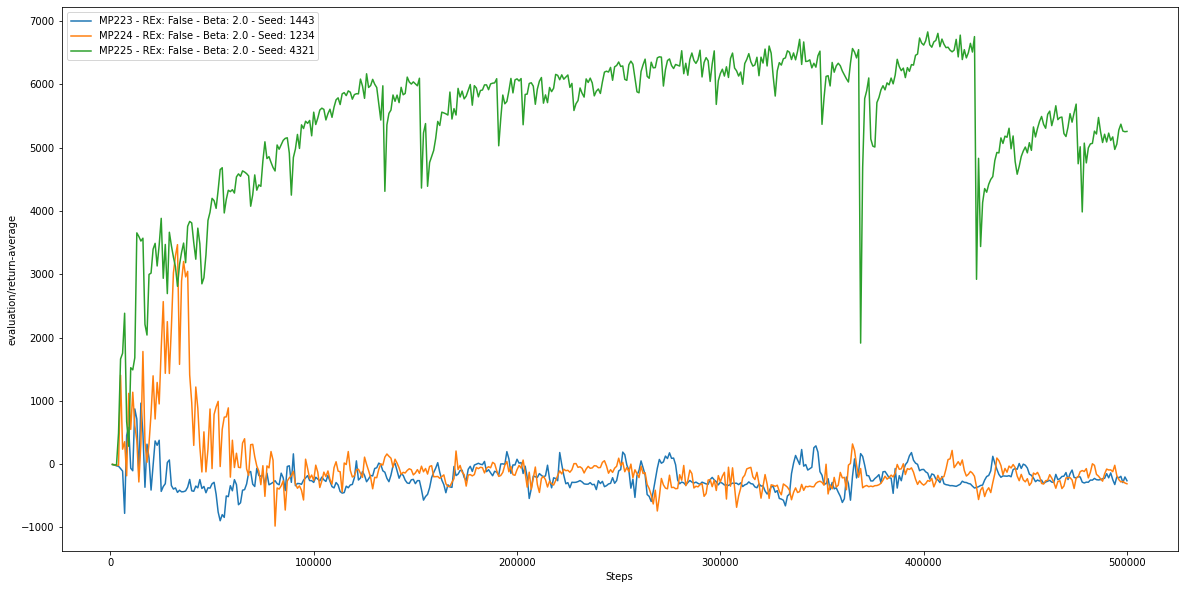

In [22]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP223,
    MP224,
    MP225,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Beta: {exp.rex_beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

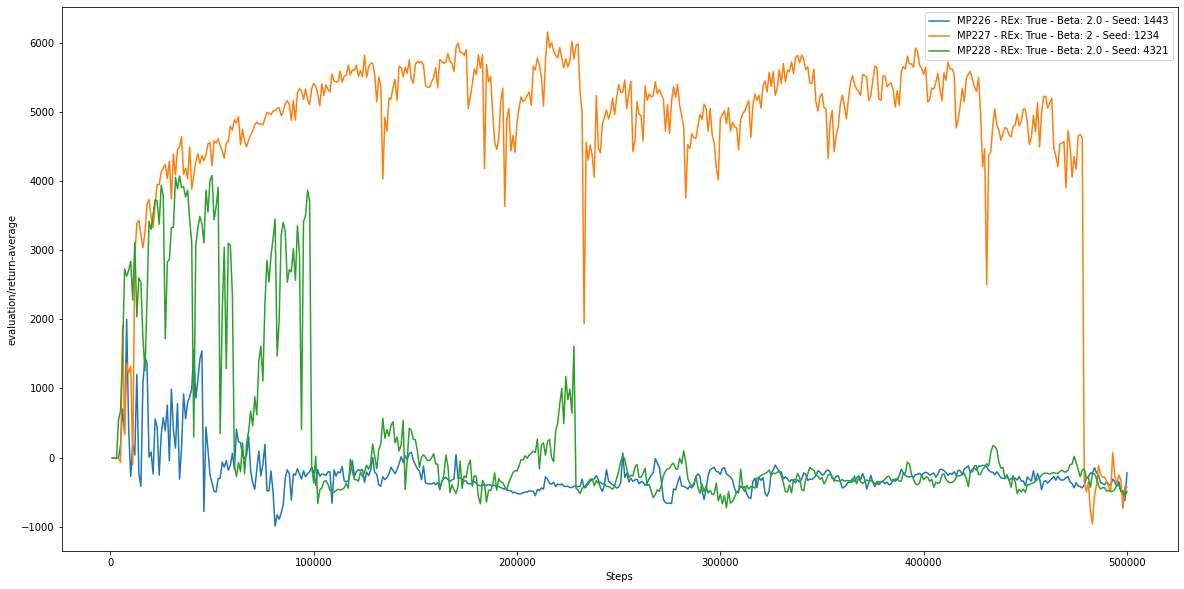

In [23]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP226,
    MP227,
    MP228,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Beta: {exp.rex_beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

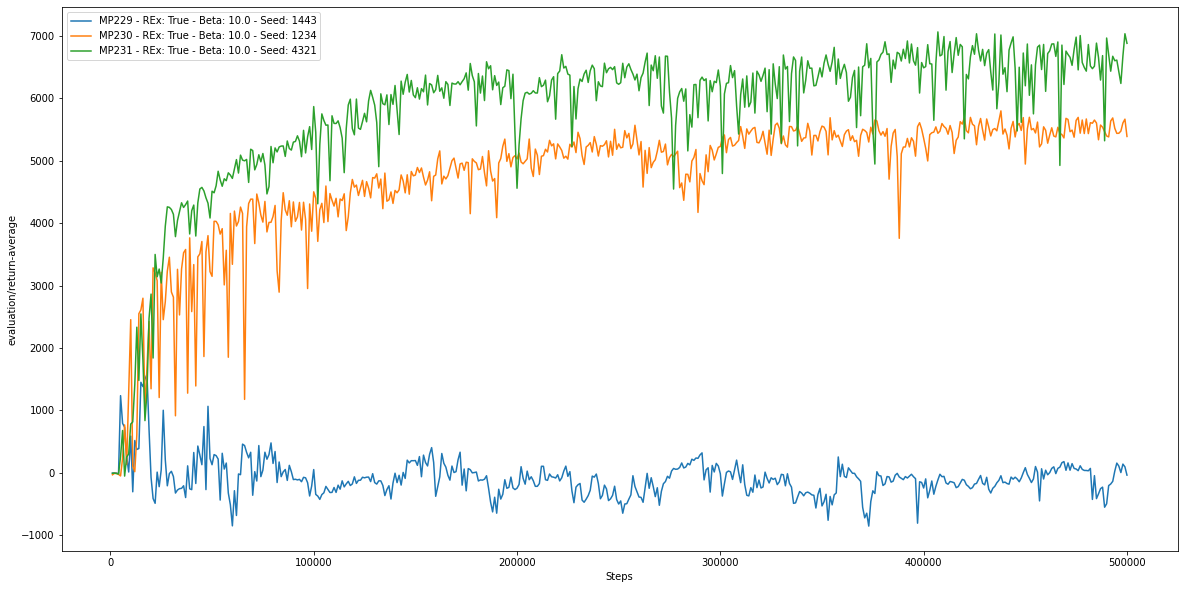

In [24]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP229,
    MP230,
    MP231,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - REx: {exp.rex} - Beta: {exp.rex_beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass